# Red Butte Creek Stream Flow Analysis

#Introduction
In this notebook we will open and plot a timeseries dataset of the daily streamflow data on Red Butte Creek. The data is freely available from the USGS and can be downloaded [here](https://waterdata.usgs.gov/usa/nwis/uv?10172200
).

Your goal is to calculate mean daily, monthly, and annual streamflow for the Red Butte Creek catchment

# Background

Hydrologic streamflow data is critically important to _____. In the Salt Lake Valley, the Red Butte Creek catchment located East of the University of Utah serves as a recharge zone? for aquifers that are integral to Utah department of water?? why important here?

# Prerequesite Python Packages

pandas, numpy, matplotlib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('red_butte_discharge_data.txt',sep='\t',skiprows=31,index_col=False)

First, lets rename the columns to be human readable.

In [3]:
column_mapper = {'agency_cd':'agency',
                 'site_no':'site_number',
                 'tz_cd':'time_zone',
                 '144406_00060':'discharge',
                 '144406_00060_cd':'data_quality_code'}
df = df.rename(columns=column_mapper)
df = df.set_index('datetime')
df.index = pd.to_datetime(df.index)

In [4]:
df

,agency,site_number,time_zone,discharge,data_quality_code
datetime,,,,,
1987-09-27 00:00:00,USGS,10172200,MDT,0.84,A:[91]
1987-09-27 01:00:00,USGS,10172200,MDT,0.84,A:[91]
1987-09-27 02:00:00,USGS,10172200,MDT,0.84,A:[91]
1987-09-27 03:00:00,USGS,10172200,MDT,1.50,A:[91]
1987-09-27 04:00:00,USGS,10172200,MDT,0.90,A:[91]
...,...,...,...,...,...
2021-09-27 12:45:00,USGS,10172200,MDT,0.55,P
2021-09-27 13:00:00,USGS,10172200,MDT,0.55,P
2021-09-27 13:15:00,USGS,10172200,MDT,0.55,P


Next, the data quality code is inappropriately designed. In some cases a code refers to the confidence interval, and in some cases it refers to the publication state of the data.

We should make two columns. For records that have a confidence interval, lets put a % confidence number in a confidence column. We should also map publication quality codes to their actual designation. If you open the data file contained in the header is the following:

/24# Data-value qualification codes included in this output:

/25#     A  Approved for publication -- Processing and review completed.

/26#     P  Provisional data subject to revision.

/27#     e  Value has been estimated.

/28#    91  Daily mean calculated from data on this day matches published daily mean within 1 percent

/29#    92  Daily mean calculated from data on this day matches published daily mean within 5 percent

/30#    93  Daily mean calculated from data on this day matches published daily mean within 10 percent


In [5]:
df.loc[df.data_quality_code.str.contains('p',case=False),'publication_state']= 'provisional'
df.loc[df.data_quality_code.str.contains('e',case=False),'publication_state']= 'estimated'
df.loc[df.data_quality_code.str.contains('a',case=False),'publication_state']= 'accepted'
df.loc[df.data_quality_code.str.contains('91',case=False),'confidence']= 1.0
df.loc[df.data_quality_code.str.contains('92',case=False),'confidence']= 5.0
df.loc[df.data_quality_code.str.contains('93',case=False),'confidence']= 10.0

In [6]:
df.drop(columns=['data_quality_code'],inplace=True)

In [7]:
df

,agency,site_number,time_zone,discharge,publication_state,confidence
datetime,,,,,,
1987-09-27 00:00:00,USGS,10172200,MDT,0.84,accepted,1.0
1987-09-27 01:00:00,USGS,10172200,MDT,0.84,accepted,1.0
1987-09-27 02:00:00,USGS,10172200,MDT,0.84,accepted,1.0
1987-09-27 03:00:00,USGS,10172200,MDT,1.50,accepted,1.0
1987-09-27 04:00:00,USGS,10172200,MDT,0.90,accepted,1.0
...,...,...,...,...,...,...
2021-09-27 12:45:00,USGS,10172200,MDT,0.55,provisional,NaN
2021-09-27 13:00:00,USGS,10172200,MDT,0.55,provisional,NaN
2021-09-27 13:15:00,USGS,10172200,MDT,0.55,provisional,NaN


In [9]:
df = df.loc[df.index>'2000-9-27']

In [10]:
df.loc[:,'discharge_average']  = df['discharge'].rolling('2D').mean()

In [11]:
df

,agency,site_number,time_zone,discharge,publication_state,confidence,discharge_average
datetime,,,,,,,
2000-09-27 00:15:00,USGS,10172200,MDT,1.10,accepted,1.0,1.10000
2000-09-27 00:30:00,USGS,10172200,MDT,1.10,accepted,1.0,1.10000
2000-09-27 00:45:00,USGS,10172200,MDT,1.10,accepted,1.0,1.10000
2000-09-27 01:00:00,USGS,10172200,MDT,1.10,accepted,1.0,1.10000
2000-09-27 01:15:00,USGS,10172200,MDT,1.10,accepted,1.0,1.10000
...,...,...,...,...,...,...,...
2021-09-27 12:45:00,USGS,10172200,MDT,0.55,provisional,NaN,0.51276
2021-09-27 13:00:00,USGS,10172200,MDT,0.55,provisional,NaN,0.51276
2021-09-27 13:15:00,USGS,10172200,MDT,0.55,provisional,NaN,0.51276


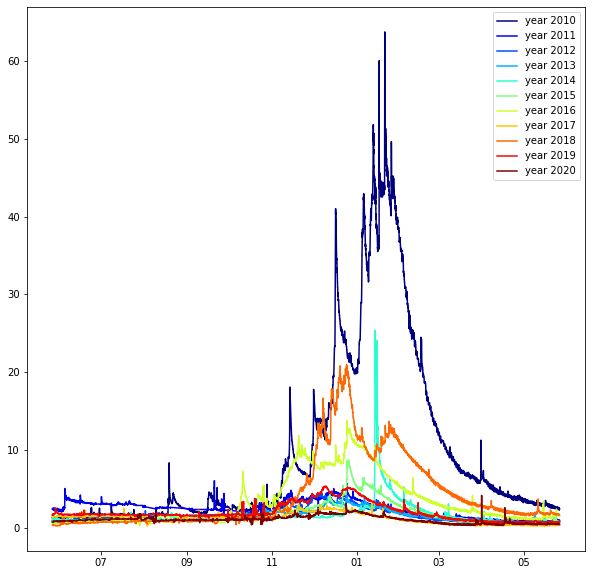

In [12]:
from matplotlib.dates import DateFormatter
import matplotlib.cm as cm


colormap = cm.get_cmap('jet')
plt.figure(figsize=(10,10))
date_formatter = DateFormatter("%m")
divisor = 10
for index,year in enumerate(range(2010,2021)):
    current_year_string = f'{year}-9-27'
    next_year_string    = f'{year+1}-9-27'
    sub_frame = df[(df.index>current_year_string) & (df.index<next_year_string)]
    plt.plot(sub_frame.index-pd.DateOffset(years=year),
             sub_frame['discharge'],
             label=f'year {year}',
             color=colormap(index/divisor))
plt.gca().xaxis.set_major_formatter(date_formatter)
plt.legend()
plt.show()